**PART A**

Epoch 0, Loss: 0.45230604979019934
Epoch 1000, Loss: 0.4524766661887873
Epoch 2000, Loss: 0.45264550056551184
Epoch 3000, Loss: 0.452812556833826
Epoch 4000, Loss: 0.4529778393315669
Epoch 5000, Loss: 0.4531413528082471
Epoch 6000, Loss: 0.453303102412422
Epoch 7000, Loss: 0.45346309367914184
Epoch 8000, Loss: 0.4536213325175023
Epoch 9000, Loss: 0.45377782519830095
Epoch 10000, Loss: 0.45393257834181117
Epoch 11000, Loss: 0.4540855989056823
Epoch 12000, Loss: 0.45423689417297164
Epoch 13000, Loss: 0.4543864717403189
Epoch 14000, Loss: 0.4545343395062709
Epoch 15000, Loss: 0.4546805056597591
Epoch 16000, Loss: 0.45482497866873967
Epoch 17000, Loss: 0.45496776726900134
Epoch 18000, Loss: 0.45510888045314407
Epoch 19000, Loss: 0.45524832745973426
Epoch 20000, Loss: 0.4553861177626427
Epoch 21000, Loss: 0.4555222610605646
Epoch 22000, Loss: 0.4556567672667287
Epoch 23000, Loss: 0.4557896464987972
Epoch 24000, Loss: 0.45592090906895844
Epoch 25000, Loss: 0.4560505654742135
Epoch 26000, Los

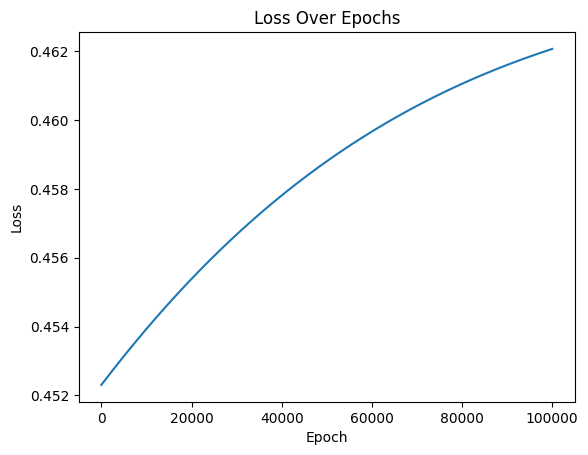

Predicted Output: [[0.64938434]]


In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the dataset
data = pd.DataFrame([
    [0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 1, 1, 1, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1],
    [0, 1, 1, 0, 1, 0],
    [1, 1, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1],
    [0, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1]],
    columns=['X1', 'X2', 'X3', 'X4', 'X5', 'Y'])

# Split the dataset into features (X) and target variable (y)
X = data[['X1', 'X2', 'X3', 'X4', 'X5']].values
y = data['Y'].values.reshape(-1, 1)

# Set random seed for reproducibility
np.random.seed(42)

# Initialize weights with random values
input_size = X.shape[1]
hidden_size = 3
output_size = 1

weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Training parameters
learning_rate = 0.00001
epochs = 100000

# Lists to store epoch and loss values
epoch_list = []
loss_list = []

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - predicted_output

    # Backpropagation
    output_error = error * sigmoid_derivative(predicted_output)
    hidden_layer_error = output_error.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(output_error) * learning_rate
    weights_input_hidden += X.T.dot(hidden_layer_error) * learning_rate

    # Calculate and store the epoch loss
    epoch_loss = np.mean(np.abs(error))
    epoch_list.append(epoch)
    loss_list.append(epoch_loss)

    # Print the epoch loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {epoch_loss}")

# Plotting the loss over epochs
plt.plot(epoch_list, loss_list)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Testing the trained model
test_input = np.array([[0, 0, 1, 1, 1]])
hidden_layer_input = np.dot(test_input, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
predicted_output = sigmoid(output_layer_input)

print("Predicted Output:", predicted_output)


**PART B**

In the provided code (task a), The architecture consists of:

**Input Layer:** 5 input neurons corresponding to the features (X1, X2, X3, X4, X5).
**Hidden Layer:** 3 neurons in the hidden layer. The choice of the number of neurons in the hidden layer is somewhat arbitrary and depends on the specific problem. It is a hyperparameter that can be tuned during the model development process. In this case, 3 neurons are chosen.
**Output Layer:** 1 neuron corresponding to the predicted output (Y).
The choice of this architecture involves some general considerations:

**Input Layer Size:** The input layer size is determined by the number of features in the dataset. In this case, there are 5 features, so the input layer has 5 neurons.

**Hidden Layer Size:** The number of neurons in the hidden layer is a hyperparameter. Too few neurons may result in the network not capturing complex patterns in the data, while too many neurons may lead to overfitting. In this case, 3 neurons are chosen.

**Output Layer Size:** Since the problem involves binary classification (Y = 0 or 1), a single neuron in the output layer is sufficient.

The choice of the activation function (sigmoid) in both the hidden and output layers is common for binary classification problems, where the goal is to produce outputs between 0 and 1.

**PART C**

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [293]:
# Define the dataset
data = pd.DataFrame([
    [0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 1, 1, 1, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1],
    [0, 1, 1, 0, 1, 0],
    [1, 1, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1],
    [0, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1]],
    columns=['X1', 'X2', 'X3', 'X4', 'X5', 'Y'])

In [294]:
# Split the dataset into features (X) and target variable (Y)
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1, 1)

In [295]:
# Split the dataset into training and testing sets
X_train, X_test = X[:10], X[10:]
Y_train, Y_test = Y[:10], Y[10:]

In [297]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def param_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh_derivative(x):
    return 1 - x**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def param_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

In [298]:
# Neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X, activation_hidden, activation_output):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = activation_hidden(self.hidden_input)
        self.output = activation_output(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y, learning_rate, derivative_hidden, derivative_output):
        # Backward pass
        error_output = y - self.output
        delta_output = error_output * derivative_output(self.output)
        error_hidden = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = error_hidden * derivative_hidden(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(delta_output) * learning_rate
        self.bias_output += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(delta_hidden) * learning_rate
        self.bias_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate, activation_hidden, activation_output, derivative_hidden, derivative_output):
        for epoch in range(epochs):
            output = self.forward(X, activation_hidden, activation_output)
            self.backward(X, y, learning_rate, derivative_hidden, derivative_output)


In [299]:
# Initialize the neural network
input_size = X.shape[1]
hidden_size = 3  # Experiment with different numbers of neurons
output_size = 1

In [300]:
# Train the neural network with different activation functions
activation_functions = [sigmoid, tanh, relu, leaky_relu, param_relu, softmax]

In [301]:
best_accuracy = 0.0
best_activation_functions = None


In [312]:
for activation_function in activation_functions:
    # Initialize the neural network
    neural_network = NeuralNetwork(input_size, hidden_size, output_size)

    # Train the neural network
    neural_network.train(X_train, Y_train, epochs=1000, learning_rate=0.0001,  # Smaller learning rate
                         activation_hidden=activation_function, activation_output=activation_function,
                         derivative_hidden=relu_derivative, derivative_output=sigmoid_derivative)

    # Evaluate the model on the test set
    predictions = neural_network.forward(X_test, activation_function, activation_function)
    accuracy = np.mean((predictions > 0.5) == Y_test)
    print(f"Activation Function: {activation_function.__name__}, Accuracy: {accuracy}")

    # Update best accuracy and activation function
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_activation_functions = activation_function.__name__










Activation Function: sigmoid, Accuracy: 0.6
Activation Function: tanh, Accuracy: 0.2
Activation Function: relu, Accuracy: 0.2
Activation Function: leaky_relu, Accuracy: 0.2


<ipython-input-298-fbb3b9cb7fed>:20: RuntimeWarning: overflow encountered in multiply
  delta_output = error_output * derivative_output(self.output)


Activation Function: param_relu, Accuracy: 0.2
Activation Function: softmax, Accuracy: 0.2
